In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import timedelta
from datetime import datetime

C:\Users\juan.grosso\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\juan.grosso\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [47]:
#archivo provisto por el desafío, cambiar path según directorio de trabajo actual
df = pd.read_csv("C:/Users/juan.grosso/Documents/LATAM/challenge_DS_LATAM/dataset_SCL.csv", encoding = 'utf-8', engine ='python')

print(df.shape)

(68206, 18)


In [48]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [50]:
for c in df.select_dtypes("object").columns:
    df[c] = df[c].astype("category")

In [51]:
#Deleted Nan
df.dropna(inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FA74766D8>,
      dtype=object)

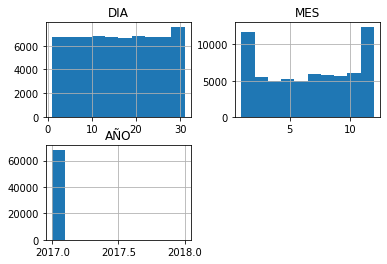

In [9]:
#distribución a lo largo del tiempo año, mes, dia
df.hist()

In [10]:
#explorando diferentes metricas groupby + count()
dopera = df.groupby(df['OPERA'])['Fecha-I'].count()

In [15]:
dopera.sort_values( inplace=True)
dopera

OPERA
Plus Ultra Lineas Aereas       49
Austral                        74
Lacsa                          92
Qantas Airways                195
British Airways               205
K.L.M.                        251
Alitalia                      259
Oceanair Linhas Aereas        279
United Airlines               335
Aeromexico                    351
Delta Air                     358
Air France                    358
Iberia                        362
Air Canada                    565
American Airlines             757
Gol Trans                     806
JetSmart SPA                 1095
Avianca                      1152
Latin American Wings         1673
Copa Air                     1850
Aerolineas Argentinas        1949
Sky Airline                 14298
Grupo LATAM                 40892
Name: Fecha-I, dtype: int64

In [17]:
#cuantos vuelos recibe cada destino
destino = df.groupby(df['SIGLADES'])['Fecha-I'].count()
destino.sort_values( inplace=True)
destino

SIGLADES
Washington             1
Cochabamba             1
Pisco, Peru            1
Puerto Stanley         1
Cataratas Iguacu       2
                    ... 
Puerto Montt        4357
Calama              5146
Lima                5269
Antofagasta         5786
Buenos Aires        6335
Name: Fecha-I, Length: 62, dtype: int64

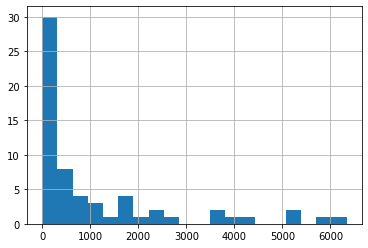

In [20]:
destino.hist(bins=20)

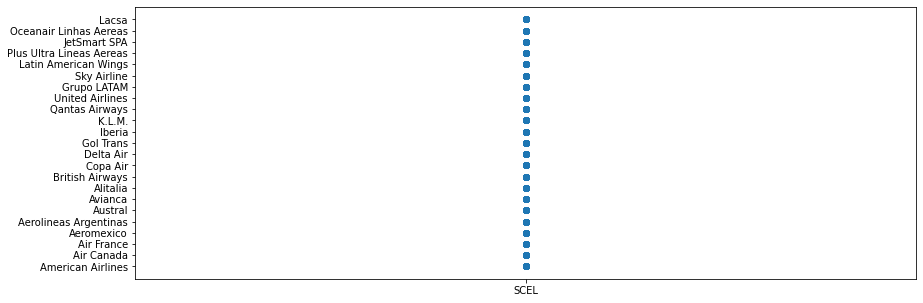

In [29]:
#de donde salen los vuelos según compañia
plt.figure(figsize=(14,5))
plt.scatter(df['Ori-I'],df['OPERA'])
plt.show()

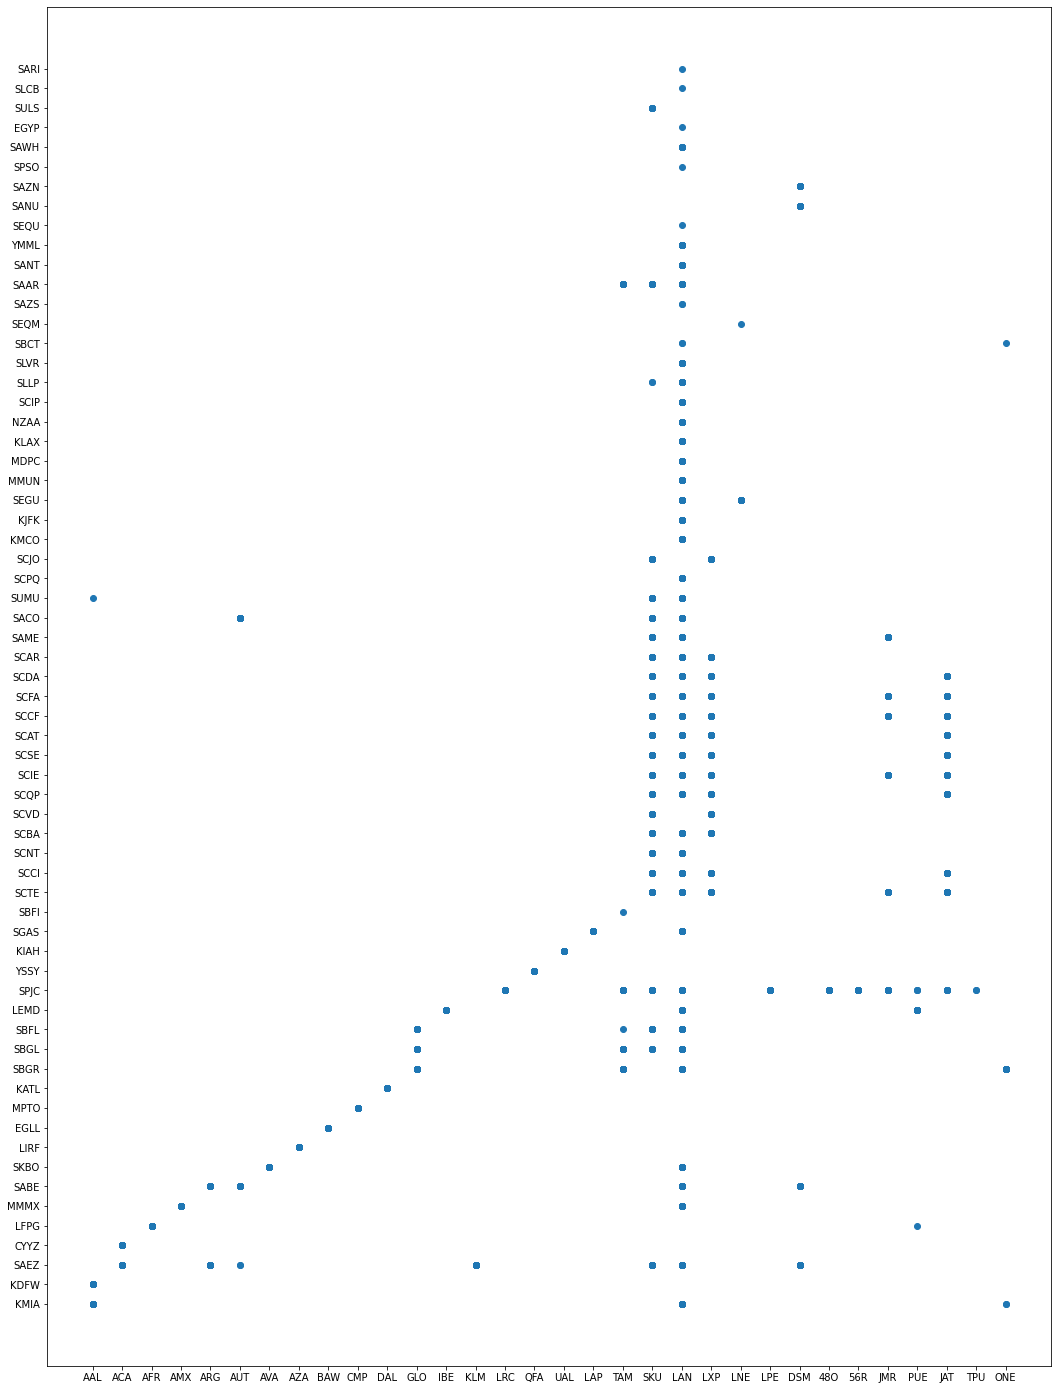

In [35]:
#a dónde van los vuelos segun compañia
plt.figure(figsize=(18,25))
plt.scatter(df['Emp-O'],df['Des-I'])
plt.show()

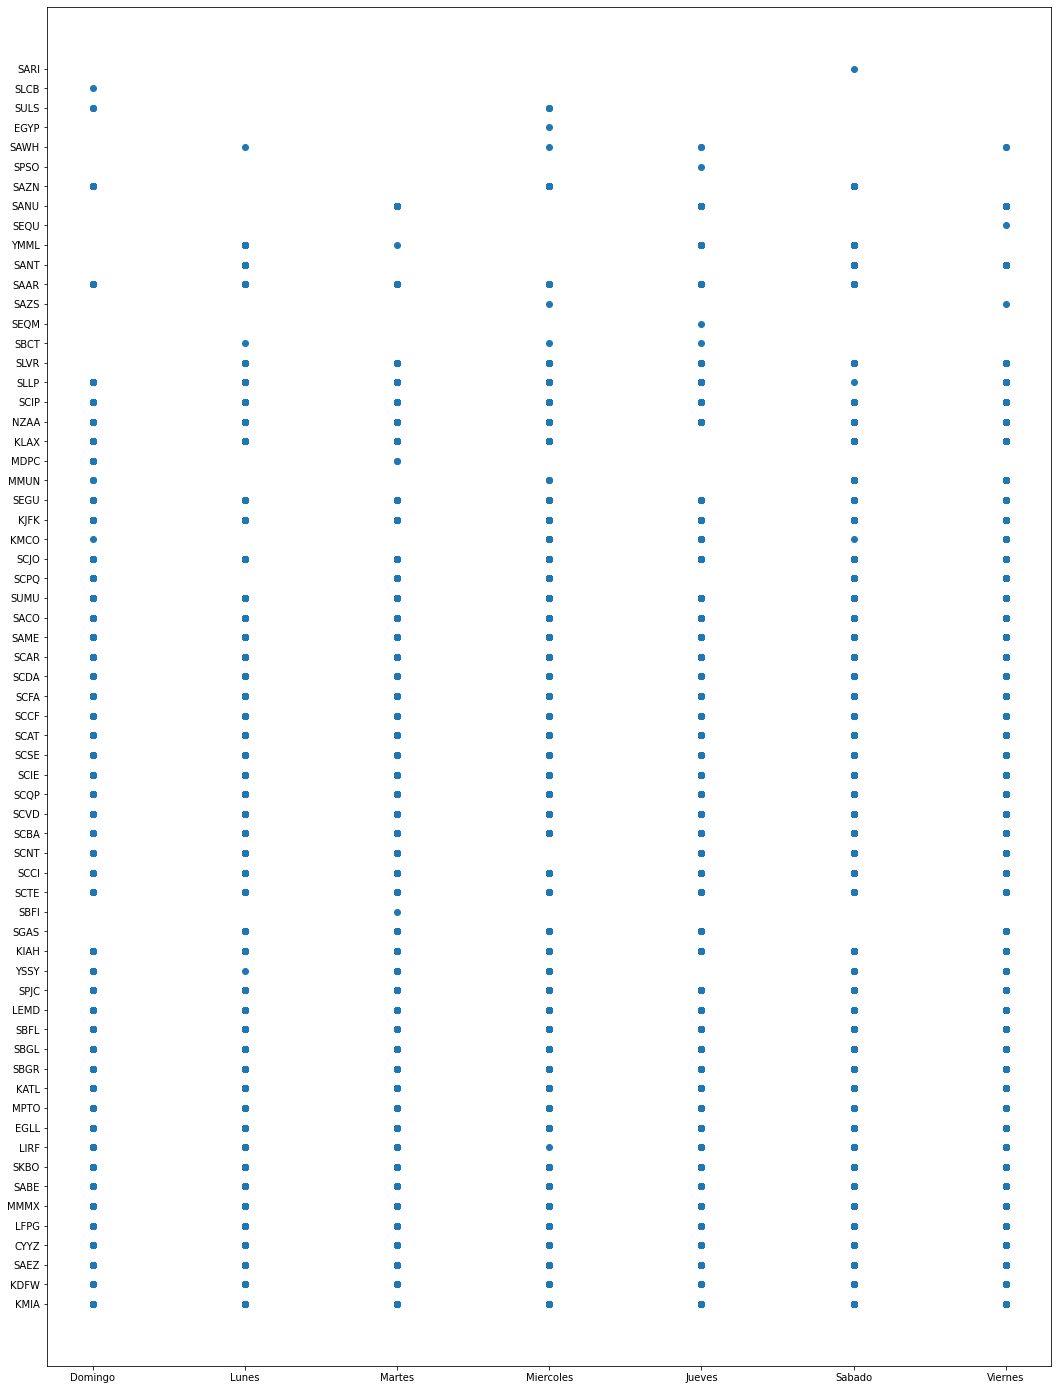

In [36]:
#hay diferencia en los destinos según del día de la semana
plt.figure(figsize=(18,25))
plt.scatter(df['DIANOM'],df['Des-I'])
plt.show()

In [52]:
#generar variables sintéticas
#temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
df['Fecha'] = pd.to_datetime(df['Fecha-I'], errors="coerce")

format = '%d-%m-%Y %H:%M:%S'
df['temporada_alta'] = df.apply(lambda row: 1 if row.Fecha < datetime.strptime('03-03-2017 00:00:00', format)
                                else 1 if datetime.strptime('15-12-2017 23:59:59', format)<row.Fecha
                                else 1 if datetime.strptime('15-07-2017 23:59:59', format)<row.Fecha and row.Fecha < datetime.strptime('31-07-2017 00:00:00', format)
                                else 1 if datetime.strptime('11-09-2017 23:59:59', format)<row.Fecha and row.Fecha < datetime.strptime('30-09-2017 00:00:00', format)
                                else 0 , axis=1)

In [53]:
df['temporada_alta'].unique()

array([1, 0], dtype=int64)

In [62]:
#dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
df['FechaO'] = pd.to_datetime(df['Fecha-O'], errors="coerce")
df['dif_min'] = df['FechaO']-df['Fecha']
df['dif_min'] = pd.to_timedelta(df.dif_min).dt.seconds/60

In [67]:
#atraso_15 : 1 si dif_min > 15, 0 si no
df['atraso_15'] =  df.apply(lambda row: 1 if row.dif_min > 15
                            else 0, axis = 1)

In [122]:
#periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I 
df['FechaHrs'] = pd.to_datetime(df['Fecha-I'])
df['FechaHrs'] = df.FechaHrs.dt.strftime('%H:%M')
#seteo periodo default 'noche'
df['periodo_dia'] = 'noche'
df.loc[(df["FechaHrs"] <= '11:59') & (df["FechaHrs"] >'05:00'), "periodo_dia"]='mañana'
df.loc[(df["FechaHrs"] <= '18:59') & (df["FechaHrs"] >'12:00'), "periodo_dia"]='tarde'

In [146]:
#devuelvo el archivo solicitado, cambiar path según directorio de trabajo actual
df1 = df[['temporada_alta','dif_min', 'atraso_15', 'periodo_dia']]
df1.to_csv("C:/Users/juan.grosso/Documents/LATAM/challenge_DS_LATAM/synthetic_features.csv", header=True)

In [138]:
#Tasa de atraso según destino
destino = df.groupby(df['SIGLADES'])['atraso_15'].sum() 

destino2 = df.groupby(df['SIGLADES'])['Fecha-I'].count()

tasa_destino = destino/destino2

In [139]:
tasa_destino

SIGLADES
Antofagasta      0.457311
Arica            0.403530
Asuncion         0.431034
Atlanta          0.664804
Auckland N.Z.    0.501385
                   ...   
Toronto          0.586572
Tucuman          0.526316
Ushuia           0.666667
Valdivia         0.463479
Washington       0.000000
Length: 62, dtype: float64

In [140]:
#Tasa de atraso según operador
num = df.groupby(df['OPERA'])['atraso_15'].sum() 

den = df.groupby(df['OPERA'])['Fecha-I'].count()

tasa_operador = num/den

In [141]:
tasa_operador

OPERA
Aerolineas Argentinas       0.604926
Aeromexico                  0.743590
Air Canada                  0.638938
Air France                  0.620112
Alitalia                    0.478764
American Airlines           0.713342
Austral                     0.527027
Avianca                     0.629340
British Airways             0.429268
Copa Air                    0.625946
Delta Air                   0.664804
Gol Trans                   0.745658
Grupo LATAM                 0.369852
Iberia                      0.450276
JetSmart SPA                0.514155
K.L.M.                      0.689243
Lacsa                       0.554348
Latin American Wings        0.601913
Oceanair Linhas Aereas      0.577061
Plus Ultra Lineas Aereas    0.714286
Qantas Airways              0.635897
Sky Airline                 0.511890
United Airlines             0.800000
dtype: float64

In [142]:
#Tasa de atraso según mes
num = df.groupby(df['MES'])['atraso_15'].sum() 

den = df.groupby(df['MES'])['Fecha-I'].count()

tasa_mes = num/den

In [143]:
tasa_mes

MES
1     0.430817
2     0.431038
3     0.467895
4     0.430677
5     0.437023
6     0.457539
7     0.464619
8     0.445682
9     0.456863
10    0.456897
11    0.438816
12    0.451385
dtype: float64

In [144]:
#Tasa de atraso según dia de la semana
num = df.groupby(df['DIANOM'])['atraso_15'].sum() 

den = df.groupby(df['DIANOM'])['Fecha-I'].count()

tasa_dia = num/den

In [145]:
tasa_dia

DIANOM
Domingo      0.448448
Jueves       0.447902
Lunes        0.455730
Martes       0.448665
Miercoles    0.439004
Sabado       0.451868
Viernes      0.441702
dtype: float64

In [148]:
#Tasa de atraso según temporada
num = df.groupby(df['temporada_alta'])['atraso_15'].sum() 

den = df.groupby(df['temporada_alta'])['Fecha-I'].count()

tasa_temporada = num/den

In [149]:
tasa_temporada

temporada_alta
0    0.447859
1    0.446832
dtype: float64

In [151]:
#Tasa de atraso según tipo de vuelo
num = df.groupby(df['TIPOVUELO'])['atraso_15'].sum() 

den = df.groupby(df['TIPOVUELO'])['Fecha-I'].count()

tasa_tipovuelo = num/den

In [152]:
tasa_tipovuelo

TIPOVUELO
I    0.492237
N    0.409755
dtype: float64

In [40]:
#pasar las categoricas a dummies
#designar un indice antes!
dataset_cat_dummy = pd.get_dummies(df.select_dtypes("category"), prefix=df.select_dtypes("category").columns)

dataset_cat_dummy.head(5)

,Fecha-I_2017-01-01 00:15:00,Fecha-I_2017-01-01 01:15:00,Fecha-I_2017-01-01 01:23:00,Fecha-I_2017-01-01 01:33:00,Fecha-I_2017-01-01 01:42:00,Fecha-I_2017-01-01 02:05:00,Fecha-I_2017-01-01 03:20:00,Fecha-I_2017-01-01 05:15:00,Fecha-I_2017-01-01 05:50:00,Fecha-I_2017-01-01 05:51:00,...,"SIGLADES_San Juan, Arg.",SIGLADES_Santa Cruz,SIGLADES_Sao Paulo,SIGLADES_Sydney,SIGLADES_Temuco,SIGLADES_Toronto,SIGLADES_Tucuman,SIGLADES_Ushuia,SIGLADES_Valdivia,SIGLADES_Washington
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
